In [1]:
import torch

import matplotlib.pyplot as plt
import numpy as np

from sparsecoding import inference

from sparsecoding.data.utils import load_bars_dictionary
from sparsecoding.visualization import plot_dictionary

/home/alvinz/sparsecoding_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load bar dictionary

A good way of evaluating whether or not a inference method is working correctly is by generating data from a known dictionary. In this notebook, this is done using a dictionary consisting of horizontal/vertical bars. This dictionary is provided in a pickle file in this rep

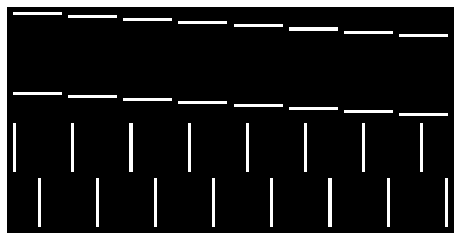

In [2]:
patch_size = 16
n_basis = 2*patch_size

# load bars dictionary 
dictionary = load_bars_dictionary()
patch_size = int(np.sqrt(dictionary.shape[0]))
n_basis = dictionary.shape[1]

nrow = 8
fig,ax = plot_dictionary(dictionary,nrow=nrow,size=8)

## Generate random data from bars dictionary

In [3]:
n_samples = 100
min_coefficient_val = 0.8

# generate coefficients
coefficients = torch.rand([n_samples,n_basis]) 
coefficients[coefficients < min_coefficient_val] = 0

# generate dataset
data = (dictionary@coefficients.t()).t()

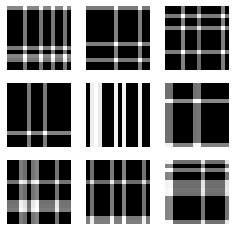

In [4]:
figure = plt.figure(figsize=(4,4))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img = (data[sample_idx])
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze().reshape([patch_size,patch_size]), cmap="gray")
plt.show()

In [5]:
# The Locally Competitive Algorithm
lca = inference.LCA(coeff_lr=1e-3,threshold=0.1,n_iter=300)
A = lca.infer(data,dictionary)

reconstruction = (dictionary@A.t()).t()

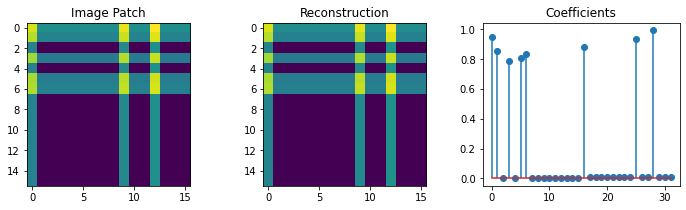

In [6]:
fig,(ax1,ax2,ax3)=  plt.subplots(figsize=(12,3),nrows=1, ncols=3)
ax1.imshow(data[0,:].detach().reshape(patch_size,patch_size))
ax1.set_title('Image Patch')

ax2.imshow(reconstruction[0,:].detach().reshape(patch_size,patch_size))
ax2.set_title('Reconstruction')

ax3.stem(A[0,:].reshape(-1))
ax3.set_title('Coefficients')
plt.show()

In [7]:
# Vanilla inference method
vanilla = inference.Vanilla(coeff_lr=1e-3,sparsity_penalty=1,n_iter=300)
A = vanilla.infer(data,dictionary)
reconstruction = (dictionary@A.t()).t()

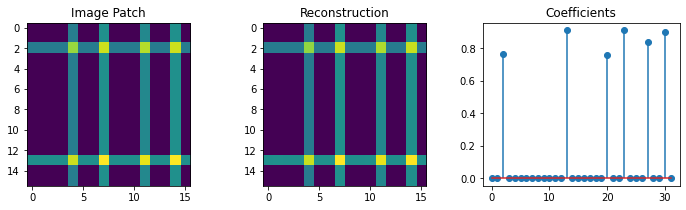

In [8]:
fig,(ax1,ax2,ax3)=  plt.subplots(figsize=(12,3),nrows=1, ncols=3)
ax1.imshow(data[1,:].detach().reshape(patch_size,patch_size))
ax1.set_title('Image Patch')

ax2.imshow(reconstruction[1,:].detach().reshape(patch_size,patch_size))
ax2.set_title('Reconstruction')

ax3.stem(A[1,:].reshape(-1))
ax3.set_title('Coefficients')
plt.show()